In [44]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter

import numpy as np
import statsmodels.api as sm

from matplotlib import pylab as plt
%matplotlib inline


# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import matplotlib as mpl
mpl.rcParams['font.family'] = ['serif']

In [49]:
r_df = ro.r("Seatbelts")

with localconverter(ro.default_converter + pandas2ri.converter):
  pd_from_r_df = ro.conversion.rpy2py(r_df)

df_seatbelts = pd.DataFrame(pd_from_r_df, columns=["DriversKilled","drivers","front","rear","kms","PetrolPrice","VanKilled","law"])

# stats, p_value, lags, crit = sm.tsa.kpss(np.log(pd_from_r_df))

# print(stats)
# print(p_value)
# print(lags)
# print(crit)

In [51]:
# 使用するモジュールのインポート
from datetime import datetime as dt
from datetime import timedelta

# 日付条件の設定
strdt = dt.strptime("1969-1-1", '%Y-%m-%d')  # 開始日
enddt = dt.strptime("1984-12-1", '%Y-%m-%d')  # 終了日

# 日付差の日数を算出（リストに最終日も含めたいので、＋１しています）
days_num = (enddt - strdt).days + 1  # （参考）括弧の部分はtimedelta型のオブジェクトになります

datelist = [(strdt + timedelta(days=x)).strftime("%Y-%m") for x in range(days_num)]
month_list = sorted(list(set(datelist)))

In [57]:
df_seatbelts['year_month'] = pd.to_datetime(month_list)
df_seatbelts = df_seatbelts.set_index('year_month')

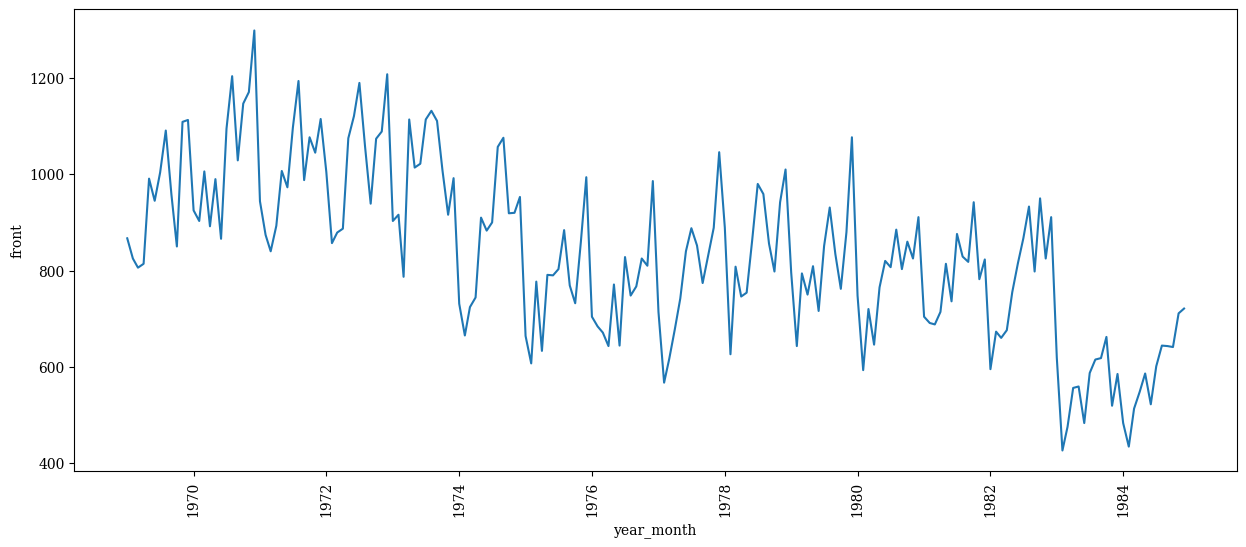

In [59]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.plot(df_seatbelts.index, df_seatbelts['front'])
ax.set_xlabel('year_month')
ax.set_ylabel('front')
plt.show()

/home/taka1204/for_time_series_analysis_study/venv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


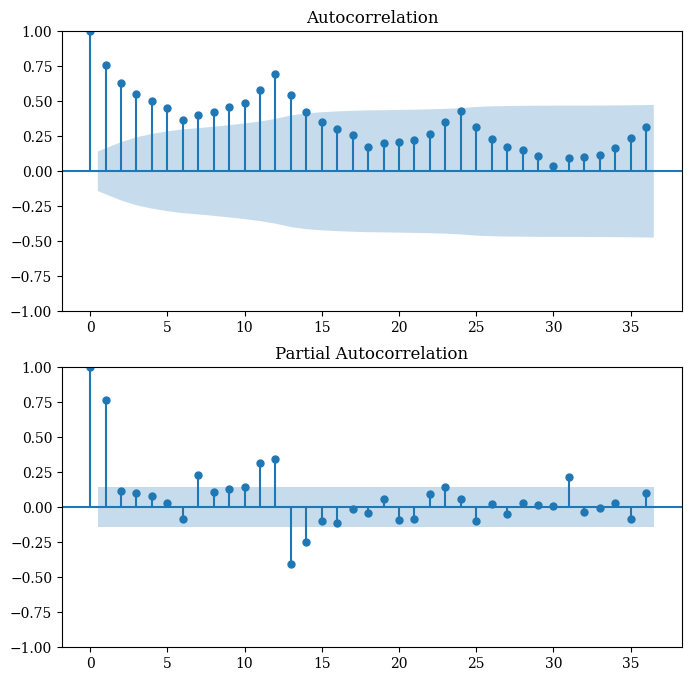

In [60]:
# 自己相関(ACF)のグラフ自動作成
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_seatbelts['front'], lags=36, ax=ax1) 

ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_seatbelts['front'], lags=36, ax=ax2) 
plt.show()

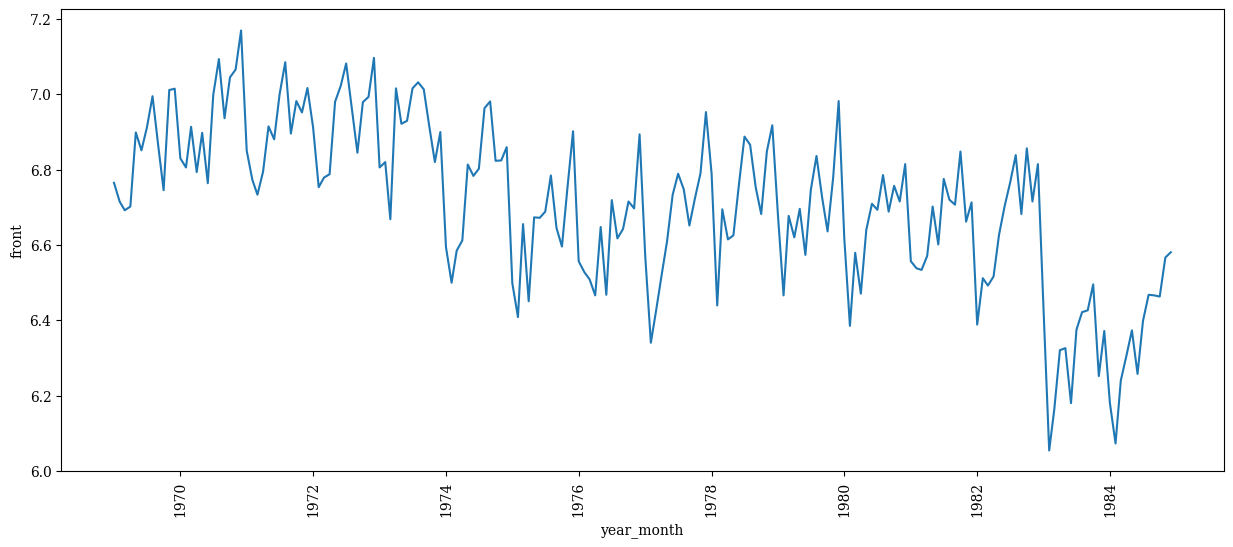

In [64]:
df_seatbelts['front_log'] = np.log(df_seatbelts['front'])

fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.plot(df_seatbelts.index, df_seatbelts['front_log'])
ax.set_xlabel('year_month')
ax.set_ylabel('front')
plt.show()

/home/taka1204/for_time_series_analysis_study/venv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


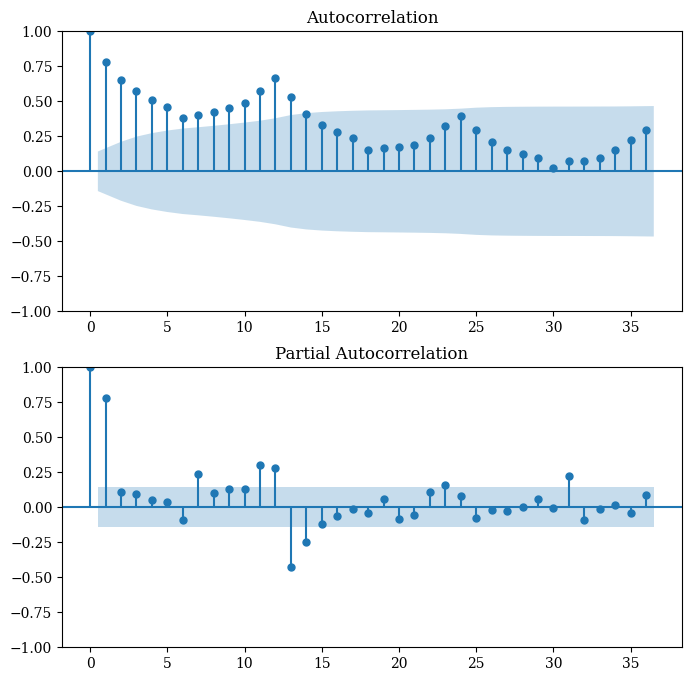

In [65]:
# 自己相関(ACF)のグラフ自動作成
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_seatbelts['front_log'], lags=36, ax=ax1) 

ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_seatbelts['front_log'], lags=36, ax=ax2) 
plt.show()

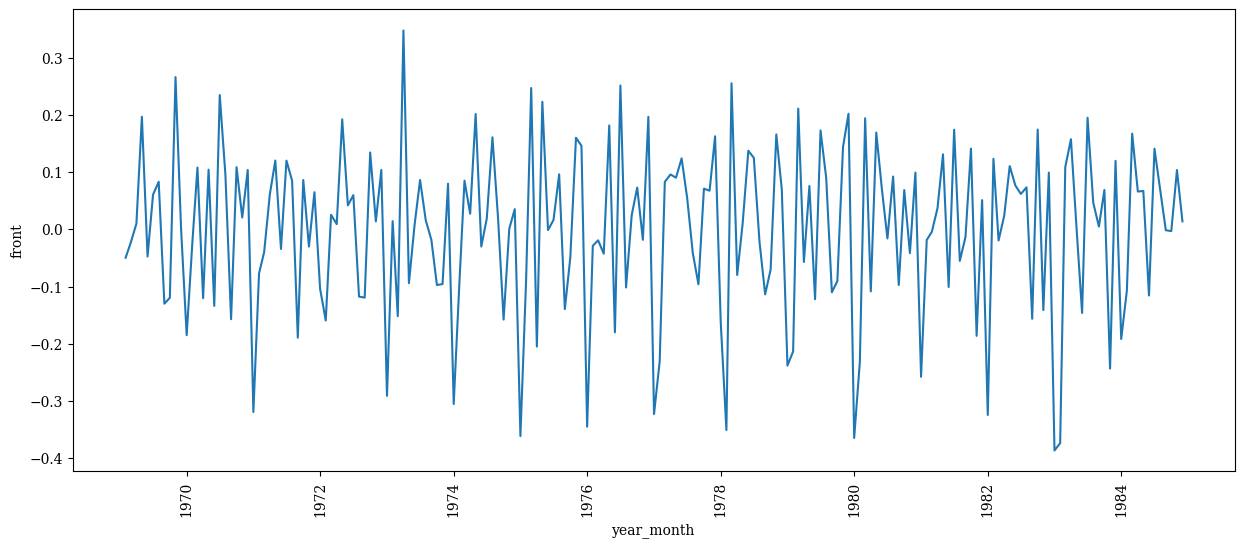

In [66]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.plot(df_seatbelts.index, df_seatbelts['front_log'].diff(1))
ax.set_xlabel('year_month')
ax.set_ylabel('front')
plt.show()

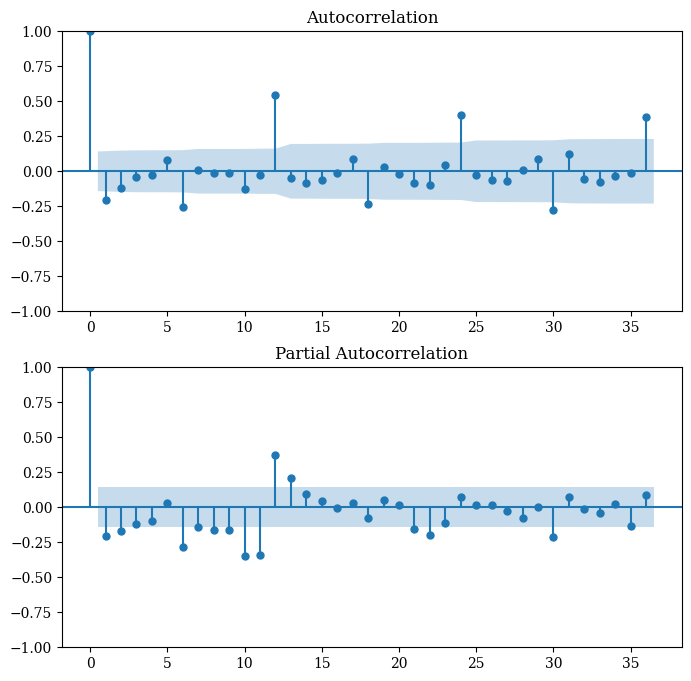

In [72]:
# 自己相関(ACF)のグラフ自動作成
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_seatbelts['front_log'].diff(1)[1:], lags=36, ax=ax1) 

ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_seatbelts['front_log'].diff(1)[1:], lags=36, ax=ax2) 
plt.show()

In [79]:
df_seatbelts['front_diff'] = df_seatbelts['front'].diff(1)
df_seatbelts['front_log_diff'] = df_seatbelts['front_log'].diff(1)

In [81]:
df_seatbelts['front'].diff(12).dropna()

year_month
1970-01-01     58.0
1970-02-01     78.0
1970-03-01    200.0
1970-04-01     78.0
1970-05-01     -1.0
              ...  
1984-08-01     29.0
1984-09-01     25.0
1984-10-01    -21.0
1984-11-01    192.0
1984-12-01    136.0
Name: front, Length: 180, dtype: float64

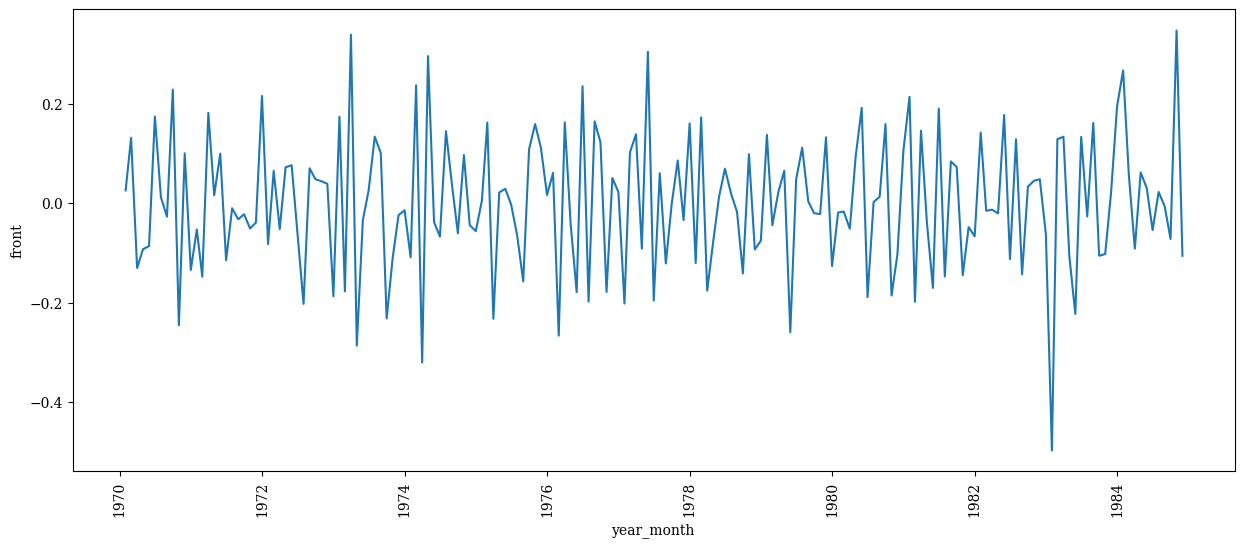

In [78]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.plot(df_seatbelts['front_log_diff'].diff(12).dropna().index, df_seatbelts['front_log_diff'].diff(12).dropna())
ax.set_xlabel('year_month')
ax.set_ylabel('front')
plt.show()

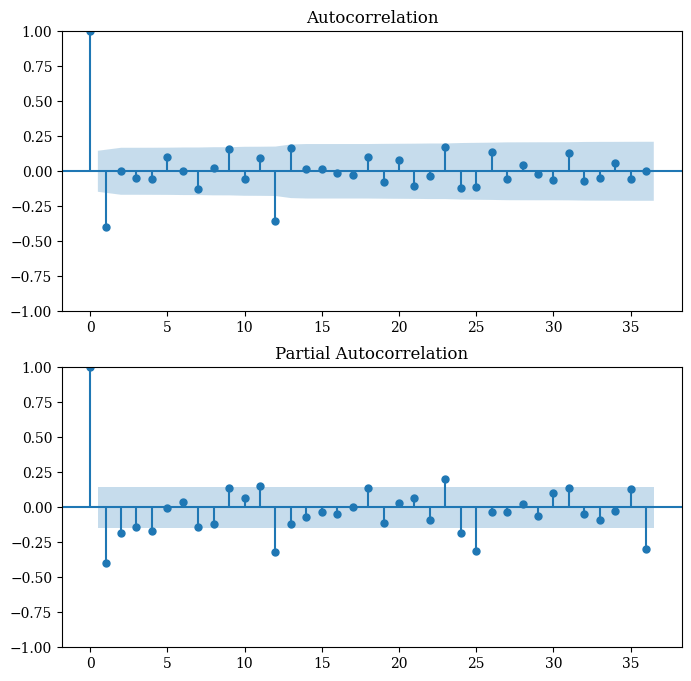

In [85]:
# 自己相関(ACF)のグラフ自動作成
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_seatbelts['front_log_diff'].diff(12).dropna(), lags=36, ax=ax1) 

ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_seatbelts['front_log_diff'].diff(12).dropna(), lags=36, ax=ax2) 
plt.show()

In [91]:
seatbelts_log = df_seatbelts[['PetrolPrice', 'front', 'law']].copy()
seatbelts_log['front'] = np.log(df_seatbelts['front'])
seatbelts_log['PetrolPrice'] = np.log(df_seatbelts['PetrolPrice'])

In [101]:
seatbelts_log_diff = seatbelts_log[['PetrolPrice', 'law']].diff(1).dropna()

# 差分系列への自動ARMA推定関数の実行
resDiff = sm.tsa.arma_order_select_ic(seatbelts_log['front'], ic='aic')
resDiff

/home/taka1204/for_time_series_analysis_study/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/taka1204/for_time_series_analysis_study/venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/taka1204/for_time_series_analysis_study/venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/taka1204/for_time_series_analysis_study/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

{'aic':             0           1           2
 0  -35.898511 -140.576259 -173.750720
 1 -213.146447 -214.115154 -214.241066
 2 -213.410115 -220.655508 -218.734091
 3 -213.104360 -218.740521 -218.640737
 4 -211.681040 -216.836533 -225.043991,
 'aic_min_order': (4, 2)}